In [1]:
import os
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot  as plt

In [2]:
train_dataset_url = "https://storage.googleapis.com/download.tensorflow.org/data/iris_training.csv"

if not os.path.exists(os.path.basename(train_dataset_url)):
    train_dataset_fp = tf.keras.utils.get_file(fname=os.path.basename(train_dataset_url),
                                           origin=train_dataset_url)

In [3]:
fname = os.path.basename(train_dataset_url)
!head -n5 {fname}

120,4,setosa,versicolor,virginica
6.4,2.8,5.6,2.2,2
5.0,2.3,3.3,1.0,1
4.9,2.5,4.5,1.7,2
4.9,3.1,1.5,0.1,0


In [4]:
column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
feature_names = column_names[:-1]
label_name = column_names[-1]

In [5]:
# 方法一
#df = pd.read_csv(fname, index_col=None,)
#df.columns = column_names
#dataset = tf.data.Dataset.from_tensor_slices(dict(df))

# 方法二
#batch_size = 1 
#train_dataset = tf.data.experimental.make_csv_dataset(
#    fname,
#    batch_size,
#    column_names=column_names,
#    label_name=label_name,
#    num_epochs=1)

In [6]:
dataset = tf.data.experimental.CsvDataset(fname, [tf.float32, tf.float32, tf.float32, tf.float32, tf.int32], 
                                         header=True)

In [7]:
# 暂时只保留而分类
def func(*items):
    return items[4] != 2
dataset = dataset.filter(func)

In [8]:
samples = next(iter(dataset.batch(32).take(1)))

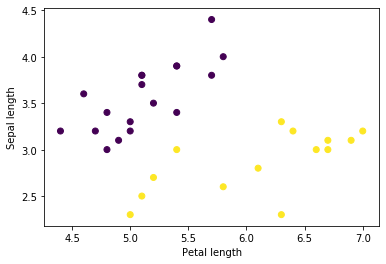

In [9]:
plt.scatter(samples[0],
            samples[1],
            c=samples[4],
            cmap='viridis')

plt.xlabel("Petal length")
plt.ylabel("Sepal length")
plt.show()

In [10]:
def pack_features_vector(*samples):
    features = tf.stack(list(samples[:4]), axis=1)
    labels =samples[4]
    return features, labels

In [11]:
dataset = dataset.batch(32).map(pack_features_vector)

In [12]:
features, label = next(iter(dataset))
print(features)
print(label)

tf.Tensor(
[[5.  2.3 3.3 1. ]
 [4.9 3.1 1.5 0.1]
 [5.7 3.8 1.7 0.3]
 [4.4 3.2 1.3 0.2]
 [5.4 3.4 1.5 0.4]
 [6.7 3.1 4.4 1.4]
 [5.1 3.7 1.5 0.4]
 [5.2 2.7 3.9 1.4]
 [6.9 3.1 4.9 1.5]
 [5.8 4.  1.2 0.2]
 [5.4 3.9 1.7 0.4]
 [6.3 3.3 4.7 1.6]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.2 3.5 1.5 0.2]
 [5.8 2.6 4.  1.2]
 [5.4 3.  4.5 1.5]
 [6.7 3.  5.  1.7]
 [6.3 2.3 4.4 1.3]
 [5.1 2.5 3.  1.1]
 [6.4 3.2 4.5 1.5]
 [5.1 3.8 1.5 0.3]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.9 0.4]
 [4.7 3.2 1.6 0.2]
 [4.8 3.4 1.6 0.2]
 [4.6 3.6 1.  0.2]
 [5.  3.3 1.4 0.2]
 [6.6 3.  4.4 1.4]
 [6.1 2.8 4.  1.3]
 [5.  3.2 1.2 0.2]
 [7.  3.2 4.7 1.4]], shape=(32, 4), dtype=float32)
tf.Tensor([1 0 0 0 0 1 0 1 1 0 0 1 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 0 1 1 0 1], shape=(32,), dtype=int32)


In [13]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(2,input_shape=(4,))
])

In [14]:
prediction = model(features)

In [15]:
tf.transpose(label)

<tf.Tensor: id=128, shape=(32,), dtype=int32, numpy=
array([1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1])>

In [16]:
prediction

<tf.Tensor: id=126, shape=(32, 2), dtype=float32, numpy=
array([[ 9.529637 , -4.732668 ],
       [ 8.018891 , -3.8663778],
       [ 9.502042 , -4.7312107],
       [ 7.470375 , -3.806059 ],
       [ 8.850976 , -4.375675 ],
       [12.793258 , -6.3842278],
       [ 8.732734 , -4.514296 ],
       [10.653181 , -5.574269 ],
       [13.443595 , -6.7121706],
       [ 9.272243 , -4.602651 ],
       [ 9.31333  , -4.8011384],
       [12.855665 , -6.698058 ],
       [ 9.755185 , -5.1158657],
       [ 8.993214 , -4.6262207],
       [ 8.610794 , -4.2674713],
       [11.171096 , -5.5457444],
       [11.564926 , -6.1487436],
       [13.364313 , -6.7785277],
       [11.859646 , -5.691337 ],
       [ 9.560788 , -4.8245835],
       [12.684574 , -6.4978848],
       [ 8.742745 , -4.5153885],
       [ 7.879425 , -3.86667  ],
       [ 9.113309 , -4.7568145],
       [ 8.01008  , -4.0014286],
       [ 8.230873 , -4.1580243],
       [ 7.67187  , -3.988062 ],
       [ 8.210101 , -4.0457525],
       [12.632926 ,

In [17]:
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [18]:
def loss(model, x, y):
    y_ = model(x)
    return loss_object(y_true=y, y_pred=y_)

In [19]:
l = loss(model, features, label)

In [20]:
def grad(model, inputs, targets):
    with tf.GradientTape() as tape:
        loss_value = loss(model, inputs, targets)
    return loss_value, tape.gradient(loss_value, model.trainable_variables)

In [21]:
optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01)

In [22]:
loss_value, grads = grad(model, features, label)

In [23]:
train_loss_results = []
train_accuracy_results = []
num_epochs = 201
for epoch in range(num_epochs):
    epoch_loss_avg = tf.keras.metrics.Mean()
    epoch_accuracy = tf.keras.metrics.SparseCategoricalAccuracy()
    for x, y in dataset:
        loss_value, grads = grad(model, x, y)
        optimizer.apply_gradients(zip(grads, model.trainable_variables))
        epoch_loss_avg(loss_value)
        epoch_accuracy(y, model(x))
    train_loss_results.append(epoch_loss_avg.result())
    train_accuracy_results.append(epoch_accuracy.result())

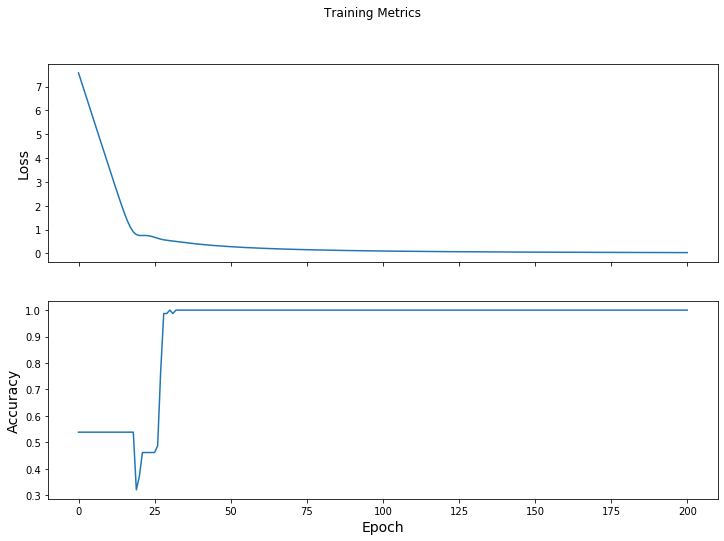

In [24]:
fig, axes = plt.subplots(2, sharex=True, figsize=(12, 8))
fig.suptitle('Training Metrics')

axes[0].set_ylabel("Loss", fontsize=14)
axes[0].plot(train_loss_results)

axes[1].set_ylabel("Accuracy", fontsize=14)
axes[1].set_xlabel("Epoch", fontsize=14)
axes[1].plot(train_accuracy_results)
plt.show()

In [33]:
predict_dataset = tf.convert_to_tensor([
    [5.1, 3.3, 1.7, 0.5,],
    [5.9, 3.0, 4.2, 1.5,],
    [6.9, 3.1, 5.4, 2.1]
])

predictions = model(predict_dataset)


In [35]:
print("Prediction: {}".format(tf.argmax(predictions, axis=1)))

Prediction: [0 1 1]


In [37]:
class_names = ['Iris setosa', 'Iris versicolor', 'Iris virginica']
for i, logits in enumerate(predictions):
    print(i)
    print(logits)
    class_idx = tf.argmax(logits).numpy()
    p = tf.nn.softmax(logits)[class_idx]
    name = class_names[class_idx]
    print("Example {} prediction: {} ({:4.1f}%)".format(i, name, 100*p))

0
tf.Tensor([ 3.5490417 -1.2315872], shape=(2,), dtype=float32)
Example 0 prediction: Iris setosa (99.2%)
1
tf.Tensor([-1.3434926  5.5980124], shape=(2,), dtype=float32)
Example 1 prediction: Iris versicolor (99.9%)
2
tf.Tensor([-3.2399797  8.750781 ], shape=(2,), dtype=float32)
Example 2 prediction: Iris versicolor (100.0%)


In [54]:
batch_size = 32

train_dataset = tf.data.experimental.make_csv_dataset(
    fname,
    batch_size,
    column_names=column_names,
    label_name=label_name,
    num_epochs=1)

Instructions for updating:
Use `tf.data.Dataset.interleave(map_func, cycle_length, block_length, num_parallel_calls=tf.data.experimental.AUTOTUNE)` instead. If sloppy execution is desired, use `tf.data.Options.experimental_determinstic`.


In [55]:
features, labels = next(iter(train_dataset))


In [56]:
labels

<tf.Tensor: id=468, shape=(32,), dtype=int32, numpy=
array([1, 0, 1, 2, 2, 2, 2, 1, 2, 0, 2, 1, 1, 0, 2, 2, 0, 0, 0, 1, 0, 1,
       0, 2, 2, 2, 2, 2, 0, 1, 0, 0])>

In [42]:
test_url = "https://storage.googleapis.com/download.tensorflow.org/data/iris_test.csv"

test_fp = tf.keras.utils.get_file(fname=os.path.basename(test_url),
                                  origin=test_url)
test_dataset = tf.data.experimental.CsvDataset(test_fp, [tf.float32, tf.float32, tf.float32, tf.float32, tf.int32], 
                                         header=True)
test_dataset = test_dataset.filter(func).batch(32)
test_dataset = test_dataset.map(pack_features_vector)
test_accuracy = tf.keras.metrics.Accuracy()

for (x, y) in test_dataset:
  logits = model(x)
  prediction = tf.argmax(logits, axis=1, output_type=tf.int32)
  test_accuracy(prediction, y)

print("Test set accuracy: {:.3%}".format(test_accuracy.result()))


Test set accuracy: 100.000%


In [44]:
model.trainable_variables

[<tf.Variable 'dense_1/kernel:0' shape=(4, 2) dtype=float32, numpy=
 array([[ 0.68127054,  0.13588105],
        [ 0.8330648 , -1.6051589 ],
        [-1.505055  ,  1.8873531 ],
        [-1.424995  ,  1.5209653 ]], dtype=float32)>,
 <tf.Variable 'dense_1/bias:0' shape=(2,) dtype=float32, numpy=array([ 0.59653914, -0.59653914], dtype=float32)>]

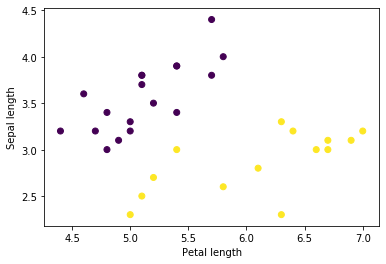

In [45]:
plt.scatter(samples[0],
            samples[1],
            c=samples[4],
            cmap='viridis')

plt.xlabel("Petal length")
plt.ylabel("Sepal length")
plt.show()

In [50]:
predict_dataset = tf.convert_to_tensor([
    [5.0, 2.3, 3.3, 1.0 ],
    [4.9, 3.1, 1.5, 0.1]
])
predictions = model(predict_dataset)

In [52]:
for i, logits in enumerate(predictions):
    print(i)
    print(logits)
    class_idx = tf.argmax(logits).numpy()
    p = tf.nn.softmax(logits)[class_idx]
    name = class_names[class_idx]
    print("Example {} prediction: {} ({:4.1f}%)".format(i, name, 100*p))

0
tf.Tensor([-0.4727353  4.1402307], shape=(2,), dtype=float32)
Example 0 prediction: Iris versicolor (99.0%)
1
tf.Tensor([ 4.1171837 -1.9235884], shape=(2,), dtype=float32)
Example 1 prediction: Iris setosa (99.8%)
